## 머신러닝을 이용한 U3 유속데이터 결측치 보간 ##

1996년부터 2020년까지 U3(EC1)의 데이터.csv에 결측치가 많아 보간이 필요할 것 같습니다
아래 코드는 머신러닝을 이용하여 간단하게 머신러닝 회귀 모델을 사용한 가이드라인입니다

In [14]:
#import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [18]:
file = '1996-2020_U3.csv' #1996년부터 2020년까지 U3(EC1)의 데이터.csv

df = pd.read_csv(file, encoding='cp949')
df = df.drop(['Station', 'Year', 'Minute', 'Second', 'Depth (meter)'], axis=1) #사용할 칼럼만 남김

df_1 = df.dropna(subset=df.columns[-1]) #결측치 제거한 data frame

#train set
x_tr = df_1.iloc[:, 0:3]
y_tr = df_1.iloc[:, -1]

#test set
x_test = df.iloc[:, 0:3]
y_test = df.iloc[:, -1]

df_1

,Month,Day,Hour,Ur Current speed (cm/s)
0,11,4,22,-5.155066
1,11,4,23,-4.947069
2,11,5,0,-5.117618
3,11,5,1,-5.379002
4,11,5,2,-5.536037
...,...,...,...,...
210533,11,11,3,-2.731514
210534,11,11,4,-0.510799
210535,11,11,5,-1.223895
210536,11,11,6,0.200796


In [19]:
#LinearRegression
model3 = LinearRegression(fit_intercept=True)
model3.fit(x_tr, y_tr)
pred3 = model3.predict(x_test)

#RF
model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
model.fit(x_tr, y_tr)
pred = model.predict(x_test)

#XGB
model2 = XGBRegressor(n_estimators=50, random_state=42)
model2.fit(x_tr, y_tr)
pred2 = model2.predict(x_test)

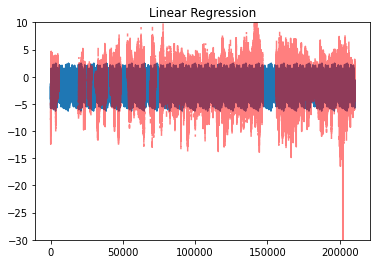

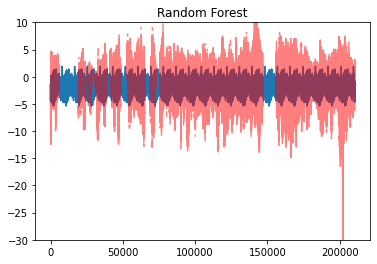

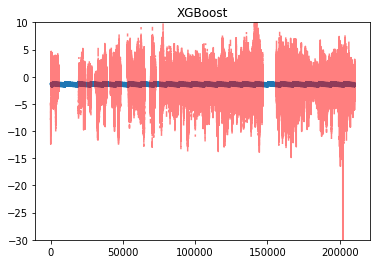

In [20]:
plt.plot(pred)
plt.plot(y_test, alpha=0.5, color='red')
plt.title('Linear Regression')
plt.ylim(-30, 10)
plt.show()

plt.plot(pred2)
plt.plot(y_test, alpha=0.5, color='red')
plt.title('Random Forest')
plt.ylim(-30, 10)
plt.show()

plt.plot(pred3)
plt.plot(y_test, alpha=0.5, color='red')
plt.title('XGBoost')
plt.ylim(-30, 10)
plt.show()